# task 01. Анализ датасета 

## Тищенко Елизавета (ИИиНД)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  

Загрузим датасет, помогающий обнаружить склонность пациента к инсульту по некоторым признакам.
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Перечислим признаки
1) id: уникальный номер
2) gender: пол ("Male", "Female", "Other")
3) age: возраст
4) hypertension: гипертония (1 в случае, если пациент страдает гипертонией, 0 в случае, если нет)
5) heart_disease: сердечные заболевания (1, если у пациента есть сердечные заболевания, 0, если нет)
6) ever_married: был ли пациент женат\замужем ("No" или "Yes")
7) work_type: работа ("children", "Govt_jov", "Never_worked", "Private", "Self-employed")
8) Residence_type: место жительства ("Rural","Urban")
9) avg_glucose_level: средний уровень глюкозы в крови
10) bmi: индекс массы тела
11) smoking_status: курение ("formerly smoked", "never smoked", "smokes", "Unknown")
12) stroke: инсульт (1, если произошел инсульт и 0, если нет)

В ходе исследования будем выявлять зависимость признака "stroke" от остальных.

In [148]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Признак "bmi" имеет 201 пропущенное значение, позже мы их заполним.

In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
df['stroke'].mean()

0.0487

Инсульт перенесли примерно 5% наблюдаемых пациентов.

## Первичный анализ признаков
### Признак "gender"

In [115]:
pd.crosstab(df['gender'], df['stroke'], margins=True).style.background_gradient()

stroke,0,1,All
gender,,,
Female,2853,141,2994
Male,2007,108,2115
Other,1,0,1
All,4861,249,5110


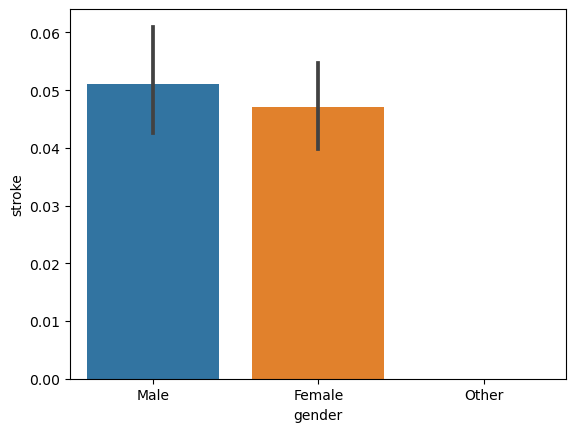

In [9]:
sns.barplot(x = "gender", y = "stroke", data = df);

В нашем датасете у мужчин и женщин примерно одинаковое число случаев инсульта, примерно 4.5%-5.0%.

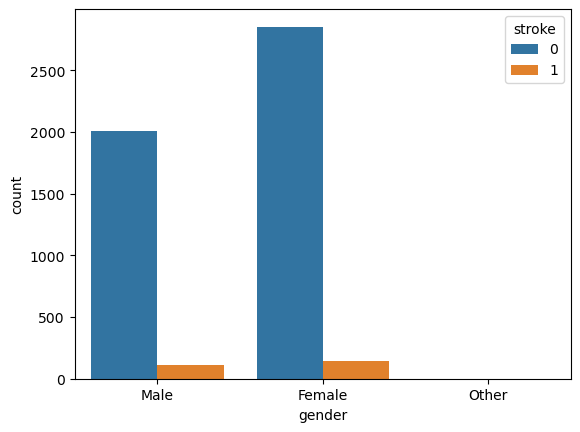

In [10]:
sns.countplot(df, x="gender", hue="stroke");

Кажется, что возникновение инсульта не очень зависит от пола.

### Признак "age"

In [11]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

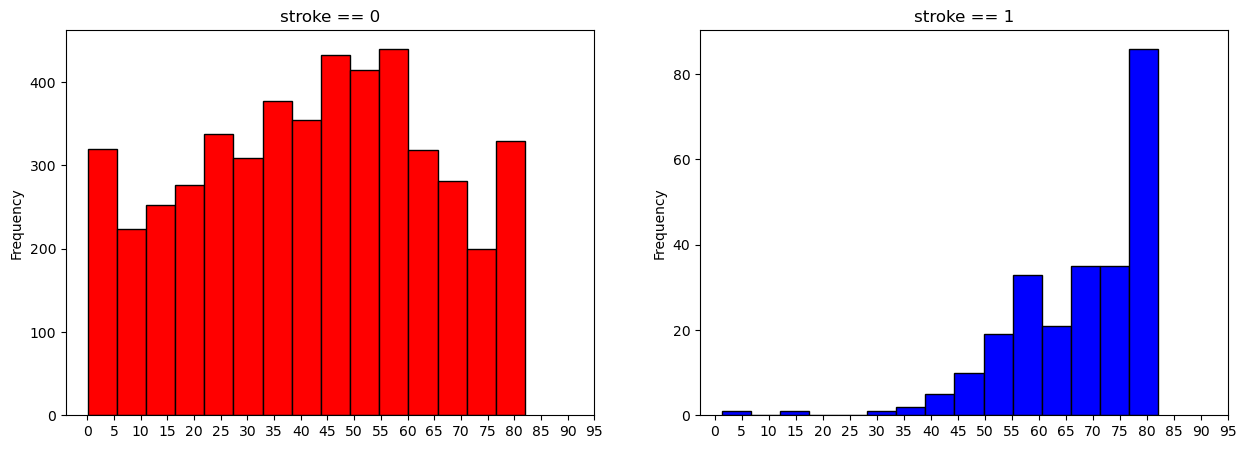

In [33]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
df[df['stroke'] == 0]['age'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('stroke == 0')
x1 = list(range(0, 100, 5))
ax[0].set_xticks(x1)
df[df['stroke'] == 1].age.plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('stroke == 1')
x2 = list(range(0, 100, 5))
ax[1].set_xticks(x2)
plt.show()

Количество случаев инсульта увеличивается экспоненциально с возрастом.

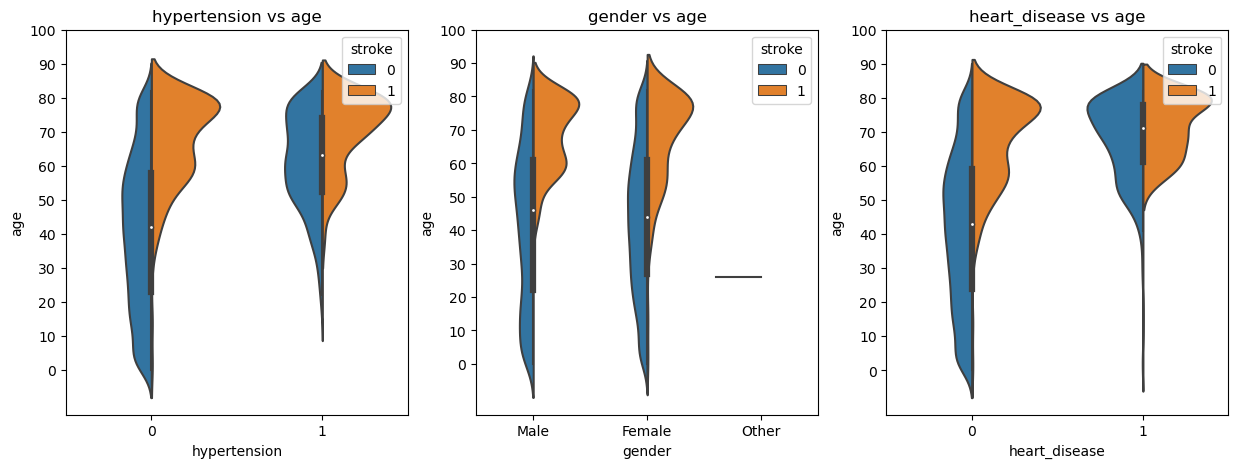

In [26]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(data=df, x="hypertension", y="age", hue="stroke", split=True, ax=ax[0])
ax[0].set_title('hypertension vs age')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data=df,x="gender", y="age", hue="stroke", split=True, ax=ax[1])
ax[1].set_title('gender vs age')
ax[1].set_yticks(range(0, 110, 10))

sns.violinplot(data=df, x="heart_disease", y="age", hue="stroke", split=True, ax=ax[2])
ax[2].set_title('heart_disease vs age')
ax[2].set_yticks(range(0, 110, 10))

plt.show()

Для пациентов, больных гипертонией и нет, распределения случаев инсульта по возрасту похожи (пиковые точки соответствуют возрасту около 60 и 80 лет).
Большая часть случаев инсульта приходится на мужчин возраста 60 и 80 лет и женщин 80 лет.
Наличие сердечных болезней увеличивает риск инсульта в промежутке от 60 до 80 лет.

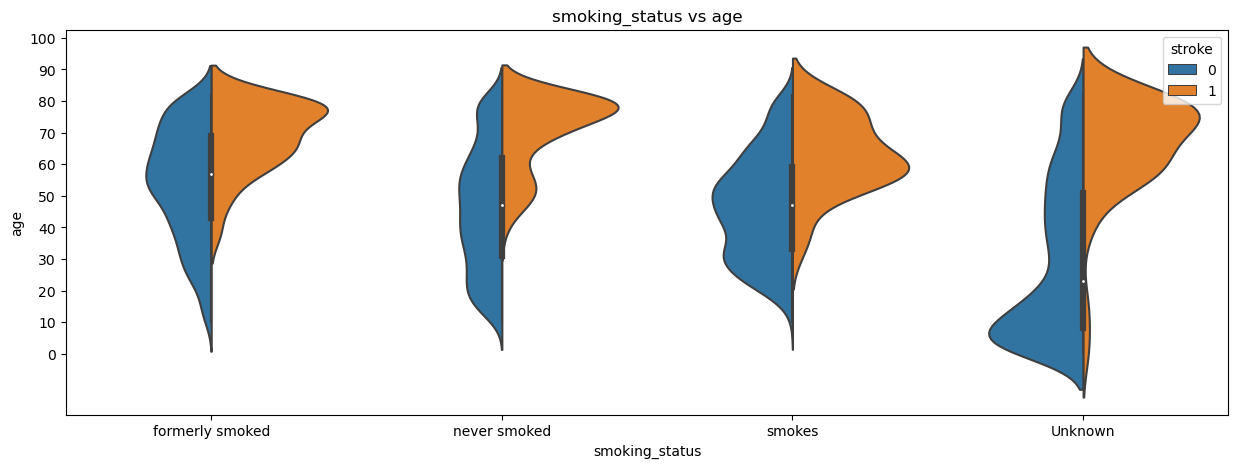

In [28]:
_, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.violinplot(data=df, x="smoking_status", y="age", hue="stroke", split=True)
ax.set_title('smoking_status vs age')
ax.set_yticks(range(0, 110, 10))

plt.show()

Можем заметить, что курящие люди переносят инсульт намного раньше (пик заболеваний приходится уже на 50 лет). А люди, которые курили когда-либо раньше, переносят инсульт в возрасте от 50 до 80 лет чаще чем некурящие. Признак "smoking_status" кажется достаточно выжным.

### Признак "smoking_status"

In [67]:
df.groupby(['smoking_status', 'stroke'])['stroke'].count()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64

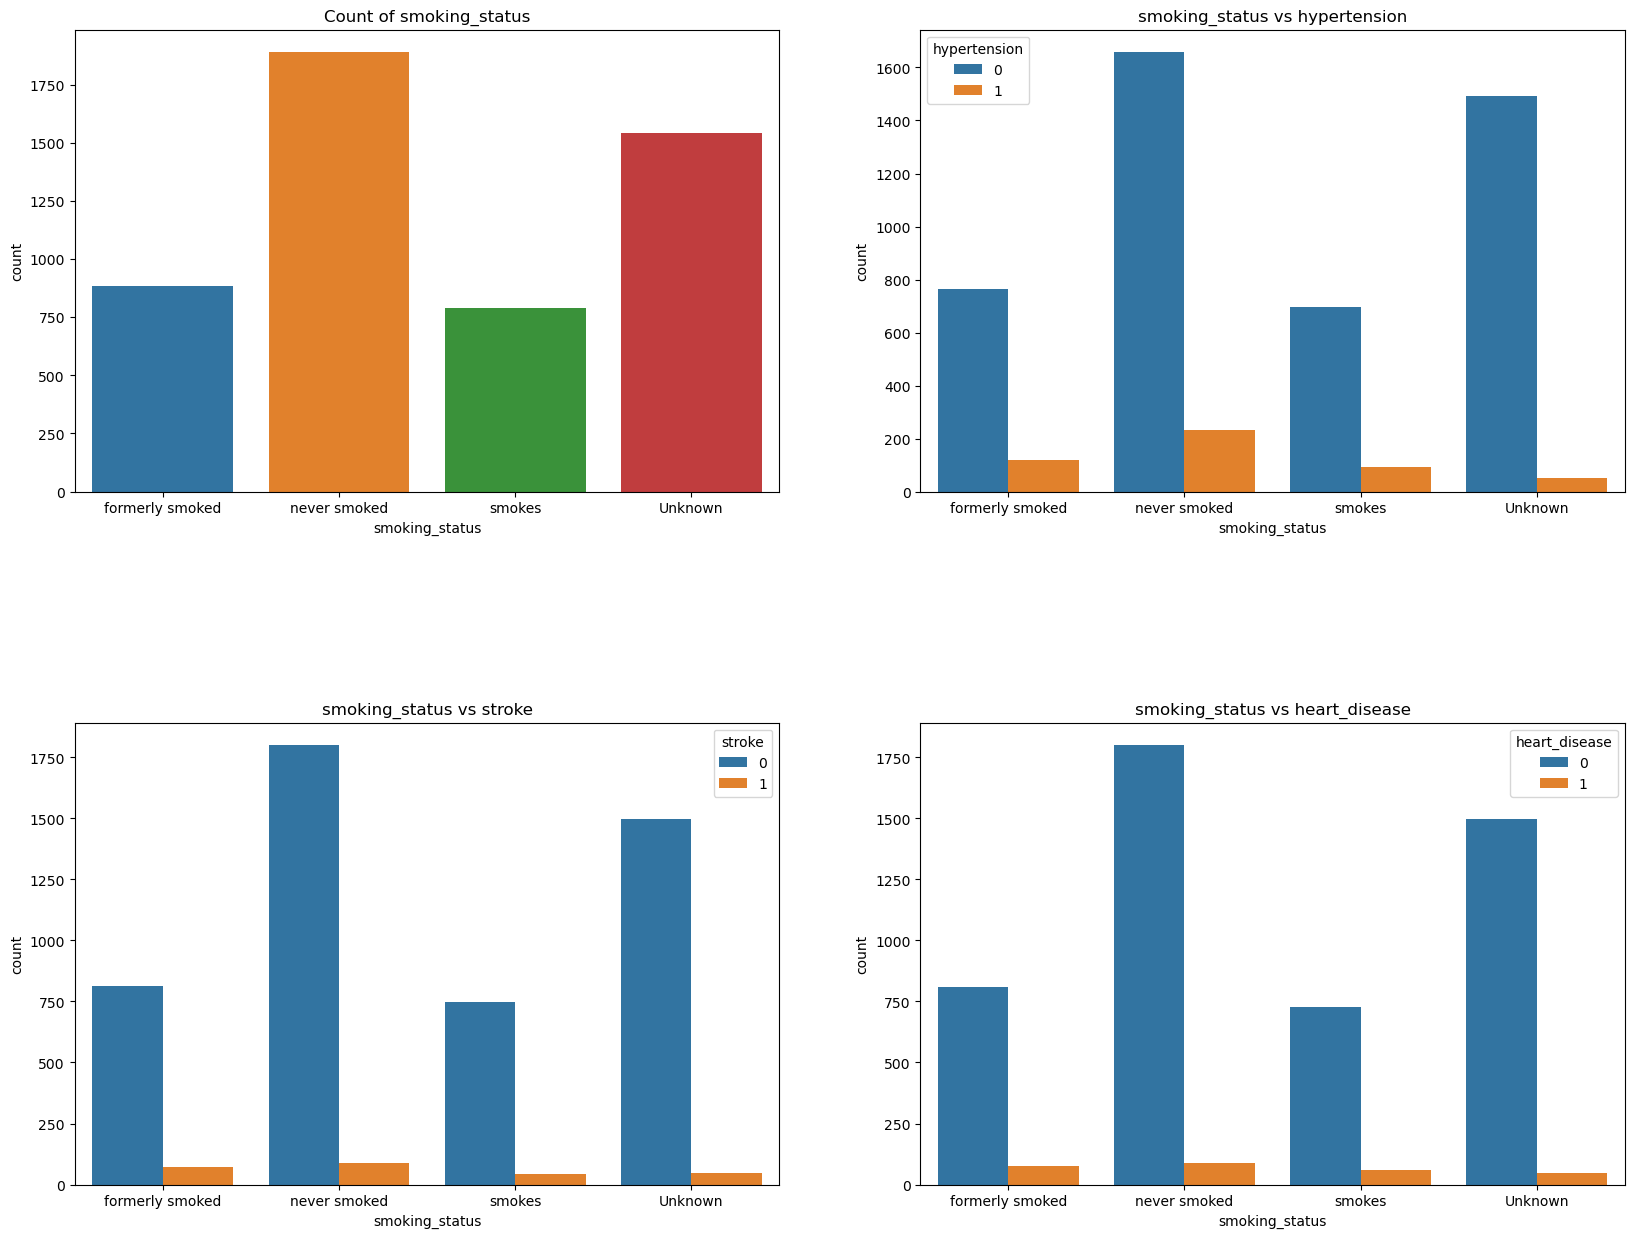

In [75]:
_, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(data=df, x='smoking_status',  ax=ax[0,0])
ax[0,0].set_title('Count of smoking_status')
sns.countplot(data=df, x='smoking_status', hue='hypertension', ax=ax[0,1])
ax[0,1].set_title('smoking_status vs hypertension')
sns.countplot(data=df, x='smoking_status', hue='stroke',  ax=ax[1,0])
ax[1,0].set_title('smoking_status vs stroke')
sns.countplot(data=df, x='smoking_status', hue='heart_disease',  ax=ax[1,1])
ax[1,1].set_title('smoking_status vs heart_disease')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Признаки "hypertension" и "heart_disease"

In [34]:
df.groupby(['hypertension', 'stroke'])['stroke'].count()

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64

In [42]:
df.groupby(['heart_disease', 'stroke'])['stroke'].count()

heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64

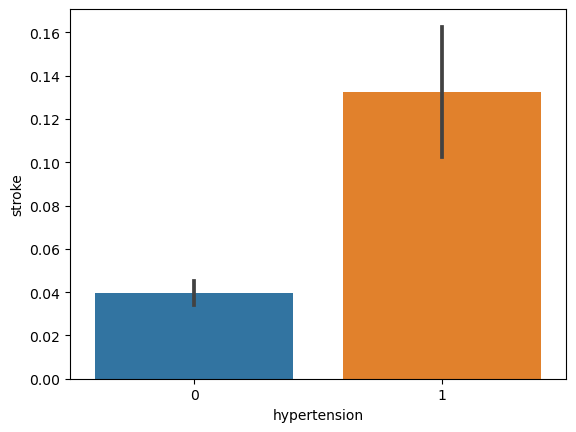

In [39]:
sns.barplot(x = "hypertension", y = "stroke", data = df);

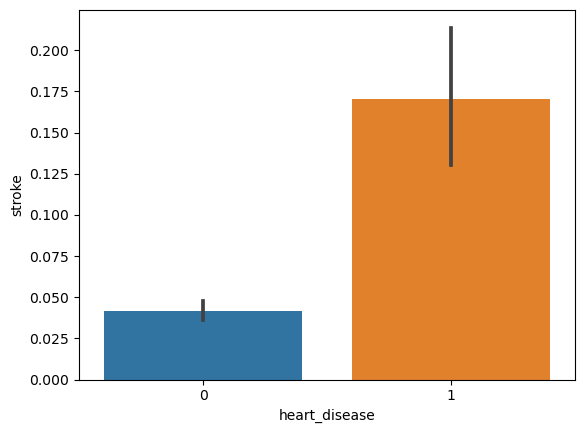

In [43]:
sns.barplot(x = "heart_disease", y = "stroke", data = df);

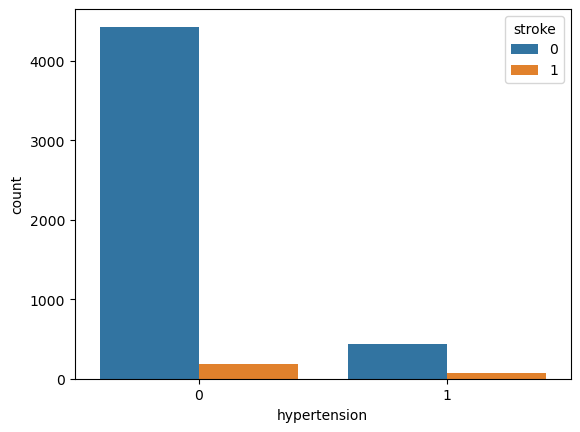

In [36]:
sns.countplot(df, x="hypertension", hue="stroke");

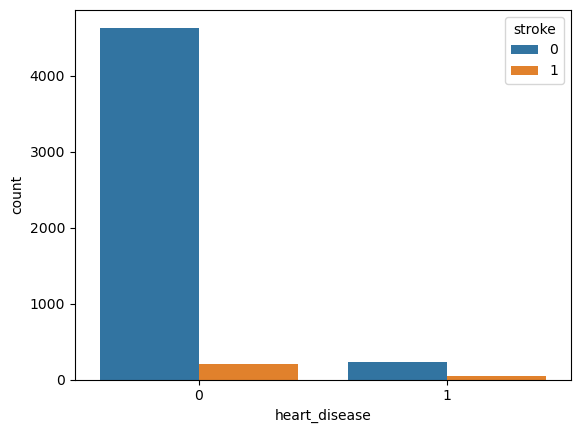

In [44]:
sns.countplot(df, x="heart_disease", hue="stroke");

Гипертония и сердечные заболевания увеличивают риск инсульта.

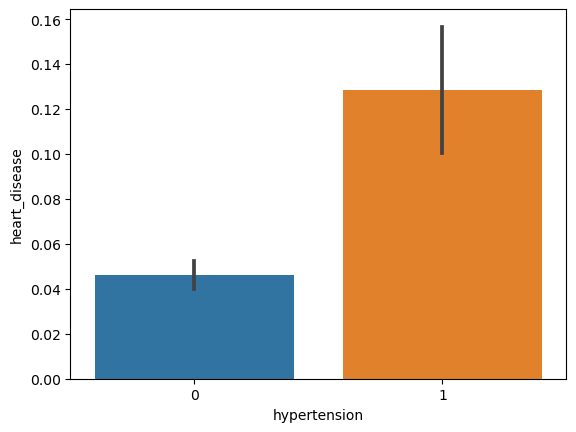

In [40]:
sns.barplot(x = "hypertension", y = "heart_disease", data = df);

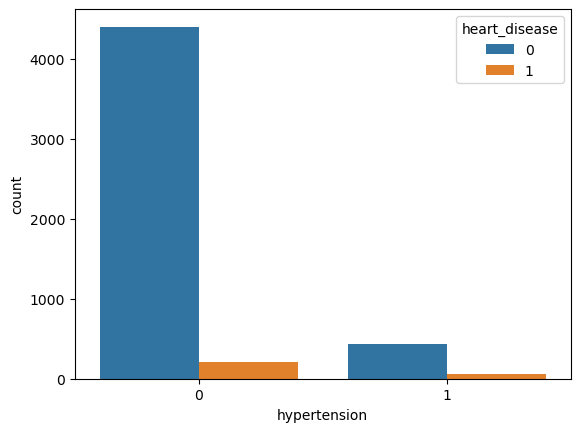

In [41]:
sns.countplot(df, x="hypertension", hue="heart_disease");

In [62]:
pd.crosstab([df['hypertension'], df['heart_disease']], df['stroke'], margins=True).style.background_gradient()

In [63]:
pd.crosstab([df['hypertension'], df['heart_disease']], df['stroke'], margins=True, normalize='all').style.background_gradient()

На первый взгляд признаки "hypertension" и "heart_disease" кажутся взаимосвязанными, но по кросс-таблице можно увидеть, что количество людей, страдающих и гипертонией, и сердечными заболеваниями, намного меньше, чем количество людей, страдающих чем-то одним. Таким образом, делаем вывод, что оба признака достаточно важны, но слабо зависимы между собой.

### Признак "ever_married"

In [54]:
df.groupby(['ever_married', 'stroke'])['stroke'].count()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
Name: stroke, dtype: int64

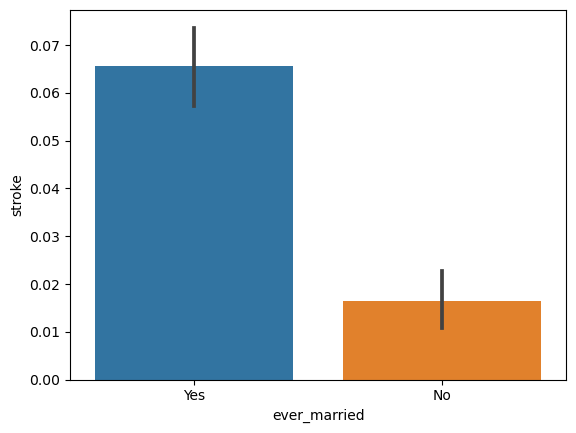

In [55]:
sns.barplot(x = "ever_married", y = "stroke", data = df);

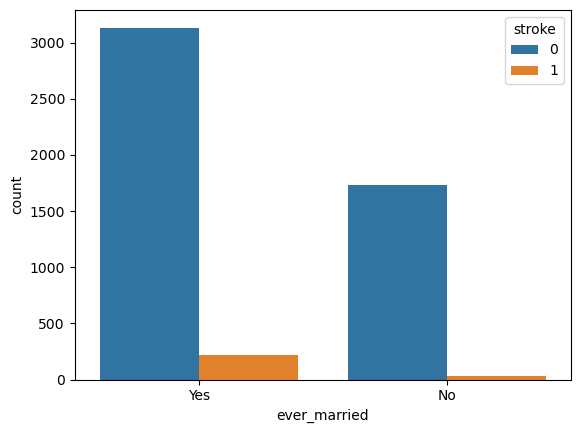

In [56]:
sns.countplot(df, x="ever_married", hue="stroke");

In [65]:
pd.crosstab([df['gender'], df['ever_married']], df['stroke'], margins=True).style.background_gradient()

In [66]:
pd.crosstab([df['gender'], df['ever_married']], df['stroke'], margins=True, normalize='all').style.background_gradient()

Кажется, что среди людей состоявших\не состоявших в браке количество случаев инсульта пропорционально. Этот признак кажется не очень важным, уберем его из датасета.

In [93]:
df=df.drop(['ever_married'], axis=1)

In [94]:
df.head()

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1


### Признак "work_type"

In [60]:
df.groupby(['work_type', 'stroke'])['stroke'].count()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64

In [83]:
pd.crosstab(df['work_type'], df['stroke'], margins=True, normalize='all').style.background_gradient()

stroke,0,1,All
work_type,,,
Govt_job,0.122114,0.006458,0.128571
Never_worked,0.004305,0.000000,0.004305
Private,0.543249,0.029159,0.572407
Self-employed,0.147554,0.012720,0.160274
children,0.134051,0.000391,0.134442
All,0.951272,0.048728,1.000000


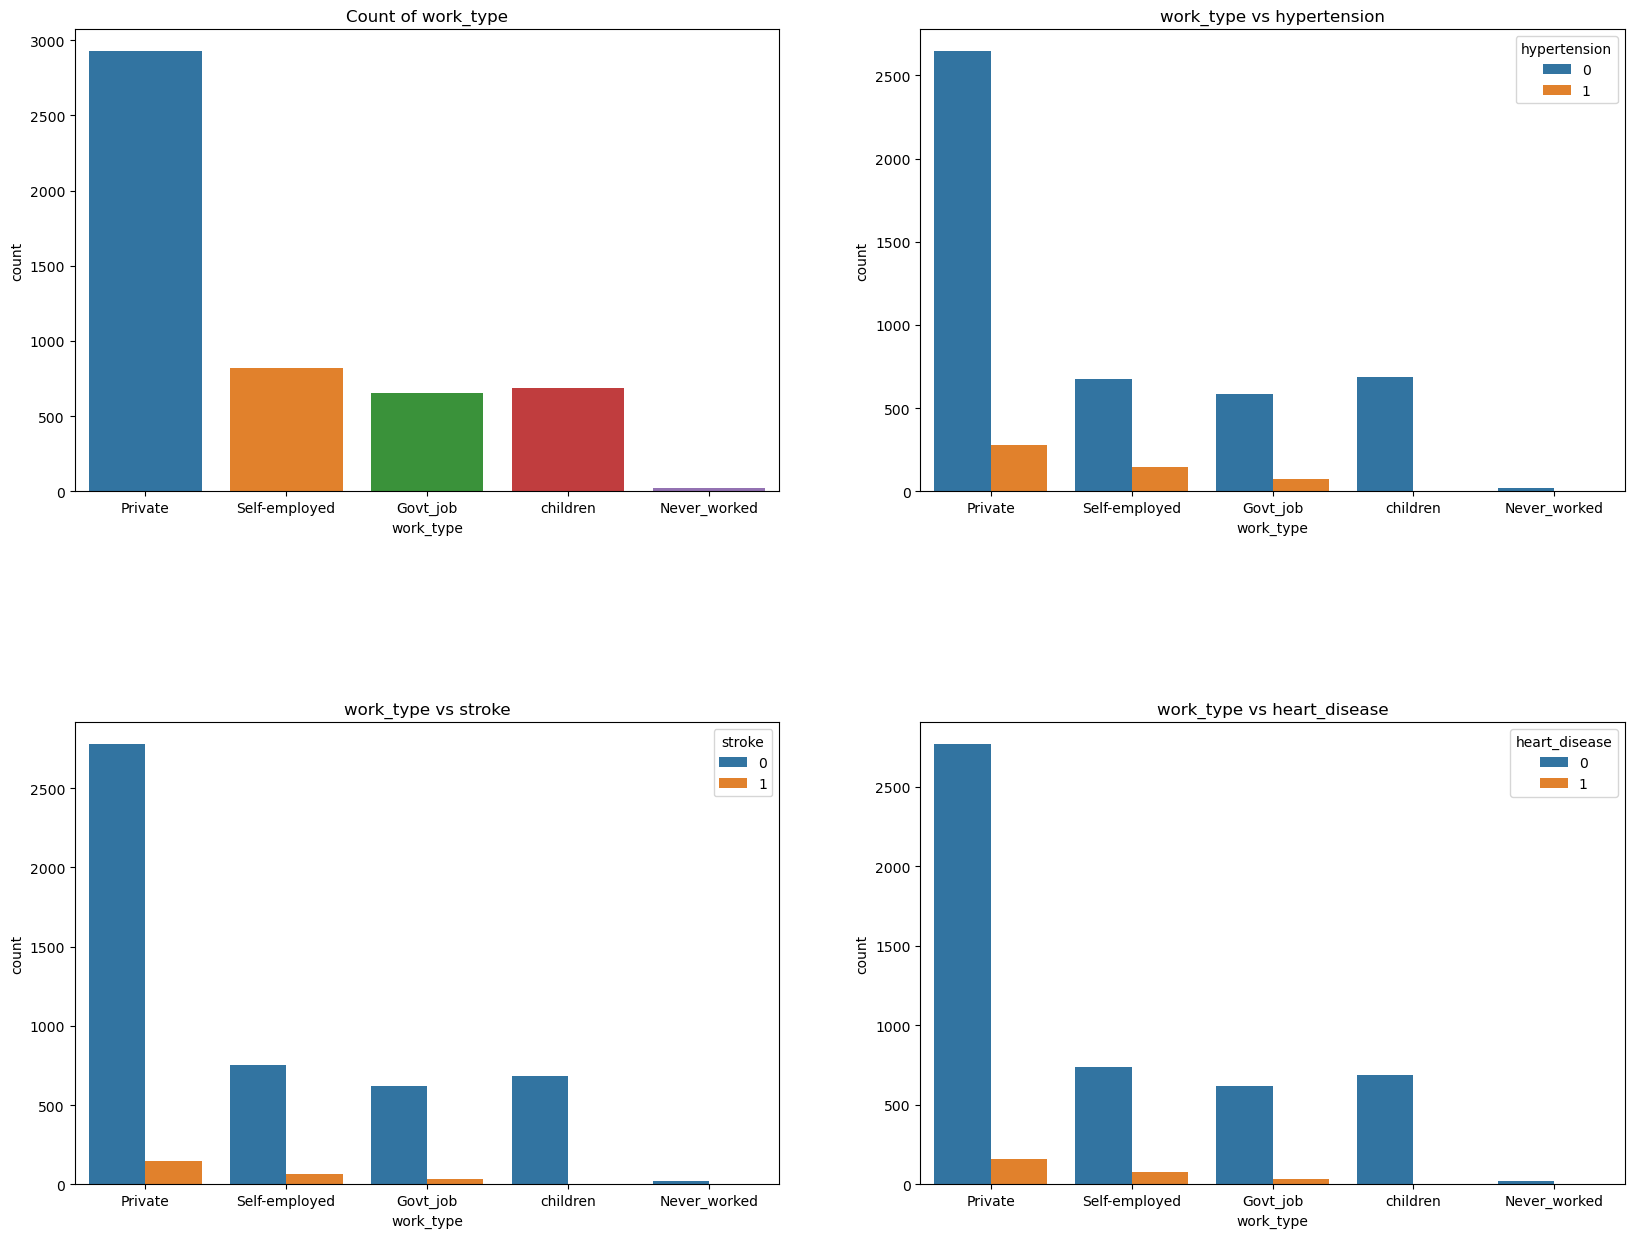

In [77]:
_, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(data=df, x='work_type',  ax=ax[0,0])
ax[0,0].set_title('Count of work_type')
sns.countplot(data=df, x='work_type', hue='hypertension', ax=ax[0,1])
ax[0,1].set_title('work_type vs hypertension')
sns.countplot(data=df, x='work_type', hue='stroke',  ax=ax[1,0])
ax[1,0].set_title('work_type vs stroke')
sns.countplot(data=df, x='work_type', hue='heart_disease',  ax=ax[1,1])
ax[1,1].set_title('work_type vs heart_disease')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Кажется, что число случаев инсульта выше среди людей, работающих в частных фирмах.

### Признак "Residence_type"

In [84]:
df.groupby(['Residence_type', 'stroke'])['stroke'].count()

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
Name: stroke, dtype: int64

In [85]:
pd.crosstab(df['Residence_type'], df['stroke'], margins=True, normalize='all').style.background_gradient()

stroke,0,1,All
Residence_type,,,
Rural,0.469667,0.022309,0.491977
Urban,0.481605,0.026419,0.508023
All,0.951272,0.048728,1.000000


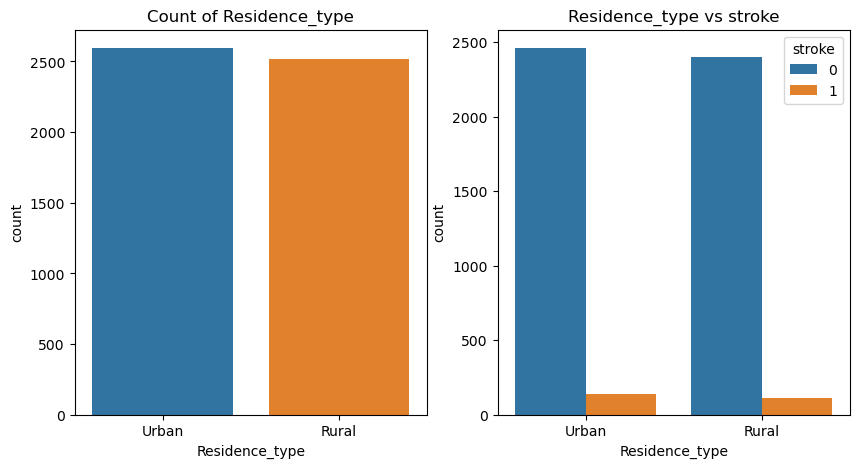

In [88]:
_, ax = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data=df, x='Residence_type',  ax=ax[0])
ax[0].set_title('Count of Residence_type')

sns.countplot(data=df, x='Residence_type', hue='stroke',  ax=ax[1])
ax[1].set_title('Residence_type vs stroke')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Данный признак не кажется важным, поскольку мы не видим разницы между городскими и сельскими жителями в доле случаев инсульта.

In [95]:
df=df.drop(['Residence_type'], axis=1)

In [96]:
df.head()

,id,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Private,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Self-employed,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Private,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Private,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Self-employed,174.12,24.0,never smoked,1


### Признак "avg_glucose_level"

In [97]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

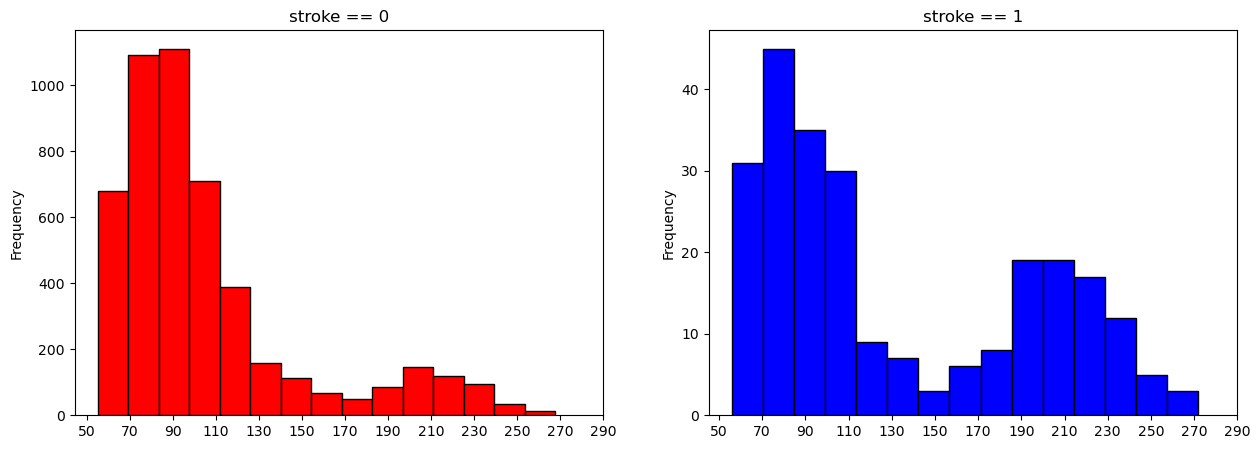

In [100]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
df[df['stroke'] == 0]['avg_glucose_level'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('stroke == 0')
x1 = list(range(50, 300, 20))
ax[0].set_xticks(x1)
df[df['stroke'] == 1].avg_glucose_level.plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('stroke == 1')
x2 = list(range(50, 300, 20))
ax[1].set_xticks(x2)
plt.show()

Можно заметить, что среди пациентов, перенесших инсульт, намного больше людей с повышенным уровнем глюкозы в крови.

### Признак "bmi"

In [103]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

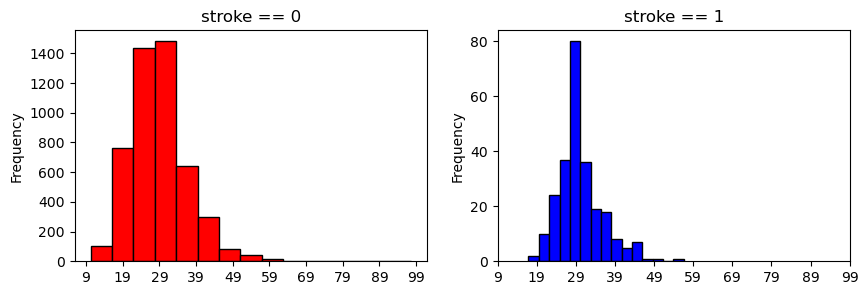

In [136]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
df[df['stroke'] == 0]['bmi'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('stroke == 0')
x1 = list(range(9, 100, 10))
ax[0].set_xticks(x1)
df[df['stroke'] == 1].bmi.plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('stroke == 1')
x2 = list(range(9, 100, 10))
ax[1].set_xticks(x2)
plt.show()

Данный признак содержит пропущенные значения, заполним их медианным значением.

In [127]:

df.bmi.fillna(df.bmi.median(), inplace = True)

In [128]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [129]:
df['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

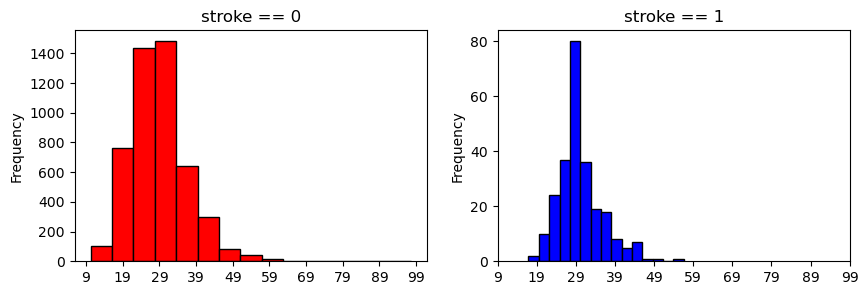

In [137]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
df[df['stroke'] == 0]['bmi'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('stroke == 0')
x1 = list(range(9, 100, 10))
ax[0].set_xticks(x1)
df[df['stroke'] == 1].bmi.plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('stroke == 1')
x2 = list(range(9, 100, 10))
ax[1].set_xticks(x2)
plt.show()

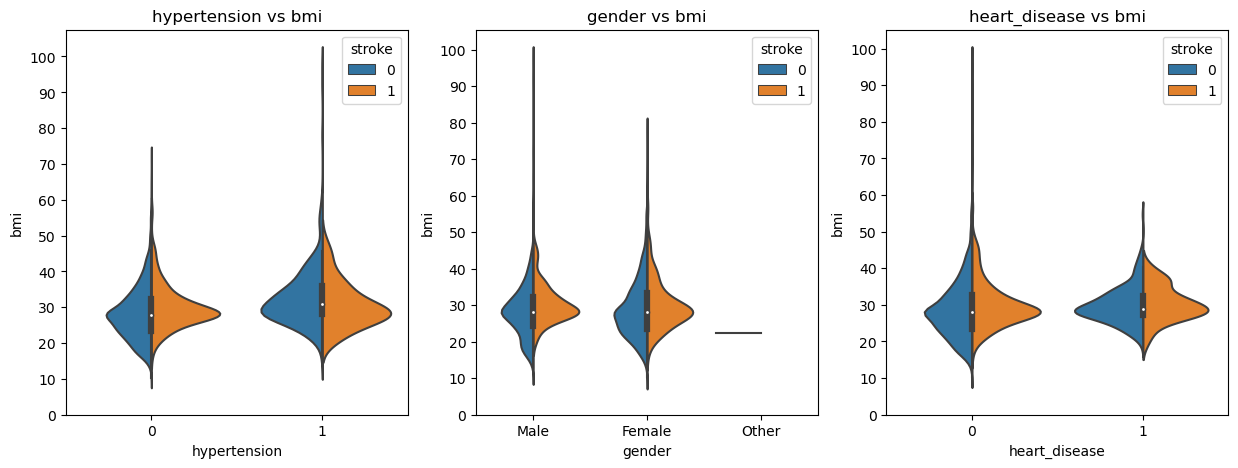

In [131]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(data=df, x="hypertension", y="bmi", hue="stroke", split=True, ax=ax[0])
ax[0].set_title('hypertension vs bmi')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data=df,x="gender", y="bmi", hue="stroke", split=True, ax=ax[1])
ax[1].set_title('gender vs bmi')
ax[1].set_yticks(range(0, 110, 10))

sns.violinplot(data=df, x="heart_disease", y="bmi", hue="stroke", split=True, ax=ax[2])
ax[2].set_title('heart_disease vs bmi')
ax[2].set_yticks(range(0, 110, 10))

plt.show()

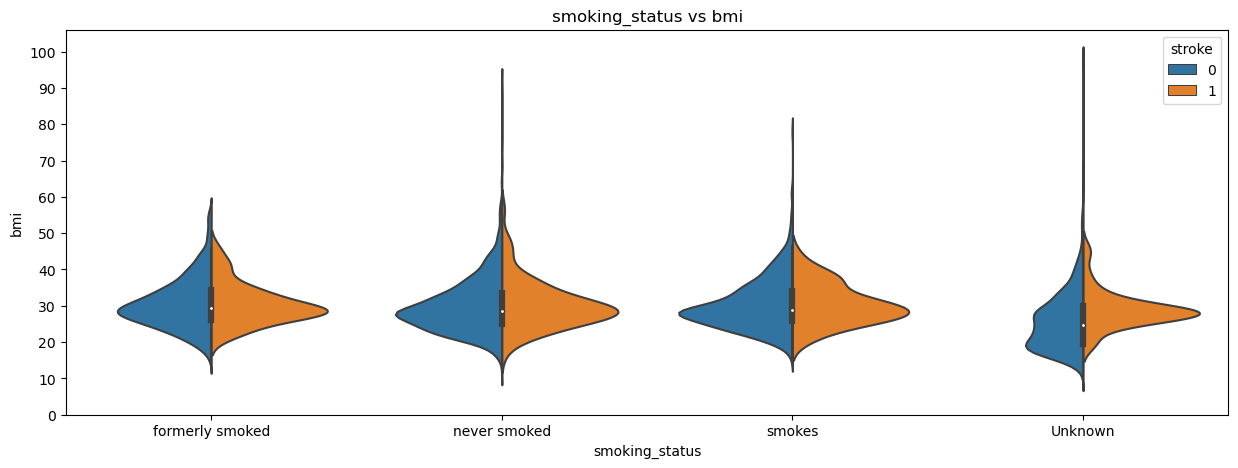

In [132]:
_, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.violinplot(data=df, x="smoking_status", y="bmi", hue="stroke", split=True)
ax.set_title('smoking_status vs bmi')
ax.set_yticks(range(0, 110, 10))

plt.show()

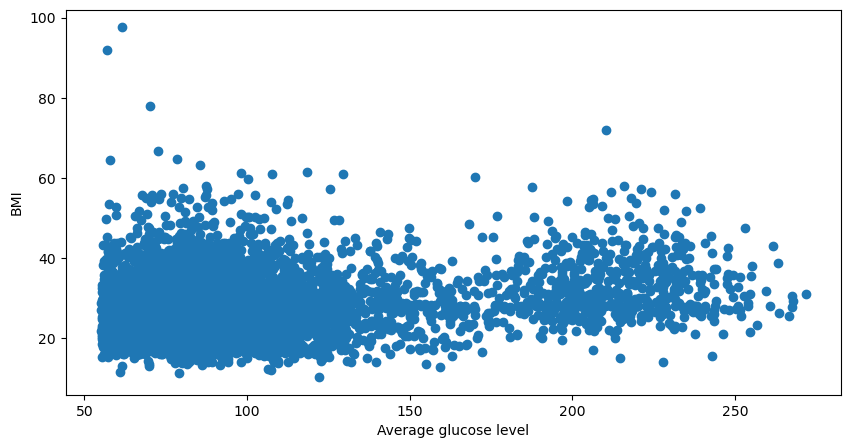

In [140]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df['avg_glucose_level'], y = df['bmi'])
plt.xlabel("Average glucose level")
plt.ylabel("BMI")

plt.show()

Кажется, что распределение величины 'bmi' не отличается среди людей, перенесших\не перенесших инсульт и относительно других признаков. Этот признак не является важным.

In [142]:
df=df.drop(['bmi'], axis=1)

In [143]:
df.head()

,id,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Private,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Self-employed,202.21,never smoked,1
2,31112,Male,80.0,0,1,Private,105.92,never smoked,1
3,60182,Female,49.0,0,0,Private,171.23,smokes,1
4,1665,Female,79.0,1,0,Self-employed,174.12,never smoked,1


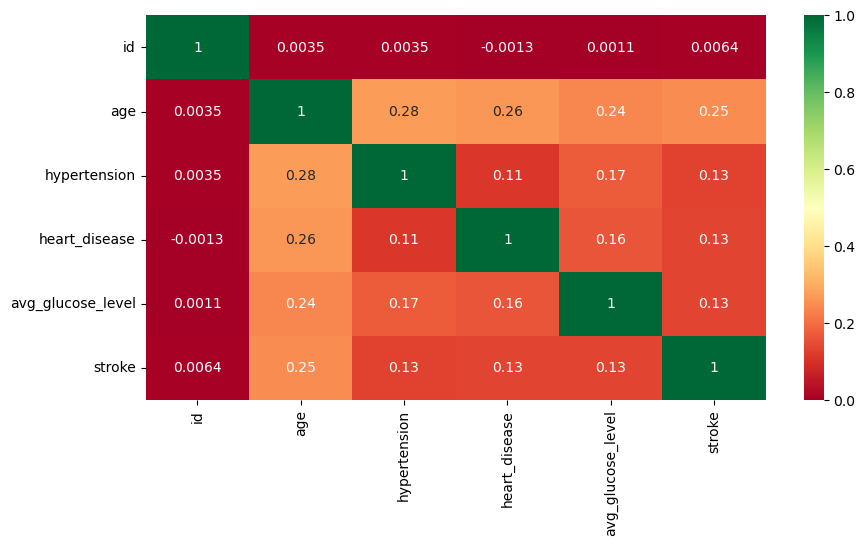

In [146]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

### Выводы